## 1. Veri Seti Seçimi ve Tanımı

### 1.1. Veri seti Kaynağı

* **Kaggle Linki:** [https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction)


### 1.2. Genel Bilgiler

| Özellik             | Değer         |
| ------------------- | ------------- |
| Toplam Kayıt Sayısı | 129,880       |
| Toplam Sütun Sayısı | 25            |
| Eğitim Seti         | 103,904 kayıt |
| Test Seti           | 25,976 kayıt  |
| Veri Türü           | .csv          |



### 1.3. Değişken Açıklamaları (Data Dictionary)

| Değişken Adı               | Tip       | Açıklama                                                                                               |
| -------------------------- | --------- | ------------------------------------------------------------------------------------------------------ |
| Gender                     | Kategorik | Yolcunun cinsiyeti (Female, Male)                                                                      |
| Customer Type              | Kategorik | Yolcunun müşteri tipi (Loyal Customer, disloyal Customer)                                              |
| Age                        | Sayısal   | Yolcunun yaşı                                                                                          |
| Type of Travel             | Kategorik | Yolculuk amacı (Personal Travel, Business Travel)                                                      |
| Class                      | Kategorik | Uçuş sınıfı (Business, Economy, Economy Plus)                                                          |
| Flight Distance            | Sayısal   | Uçuş mesafesi (mil cinsinden)                                                                          |
| Inflight wifi service      | Sayısal   | Kabin içi wifi hizmeti memnuniyeti (0: NA, 1-5 arası)                                                  |
| Departure Delay in Minutes | Sayısal   | Kalkış gecikmesi (dakika cinsinden)                                                                    |
| Arrival Delay in Minutes   | Sayısal   | Varış gecikmesi (dakika cinsinden)                                                                     |
| Overall Satisfaction       | Kategorik | Genel memnuniyet (satisfied, neutral or dissatisfied)                                                  |
| ...                        | ...       | Diğer hizmet kalitesi puanları (Seat comfort, Food and drink, Inflight entertainment, Cleanliness vb.) |

### 1.4. Problem Tanımı

Bu analizde **Airline Passenger Satisfaction Dataset** kullanılarak:

1. Yolcu demografik özellikleri ile memnuniyet arasındaki ilişkiler incelenecek.
2. Uçuş mesafesi, gecikmeler ve hizmet kalite puanlarının memnuniyete etkisi değerlendirilecek.
3. Memnuniyet seviyesini etkileyen en önemli faktörler istatistiksel ve görsel yöntemlerle belirlenecek.

---


## Kütüphaneleri çağıralım, veriyi yükleyelim.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
from scipy import stats

sns.set_style("whitegrid")

df = pd.read_csv("train.csv")
#ilk 5 satır
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
#veri tipi ve eksik değer kontrolü
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039


## 2. İstatistiksel Özet

### 2.1. Sayısal Değişkenler İçin Genel İstatistikler



In [20]:
num_summary = df.describe().T
num_summary['median'] = df.median(numeric_only=True)
num_summary['variance'] = df.var(numeric_only=True)
num_summary['skewness'] = df.skew(numeric_only=True)
num_summary['kurtosis'] = df.kurtosis(numeric_only=True)
print(num_summary)

                                      count          mean           std   min  \
Unnamed: 0                         103904.0  51951.500000  29994.645522   0.0   
id                                 103904.0  64924.210502  37463.812252   1.0   
Age                                103904.0     39.379706     15.114964   7.0   
Flight Distance                    103904.0   1189.448375    997.147281  31.0   
Inflight wifi service              103904.0      2.729683      1.327829   0.0   
Departure/Arrival time convenient  103904.0      3.060296      1.525075   0.0   
Ease of Online booking             103904.0      2.756901      1.398929   0.0   
Gate location                      103904.0      2.976883      1.277621   0.0   
Food and drink                     103904.0      3.202129      1.329533   0.0   
Online boarding                    103904.0      3.250375      1.349509   0.0   
Seat comfort                       103904.0      3.439396      1.319088   0.0   
Inflight entertainment      

* `describe()` ile ortalama, standart sapma, min–max, çeyrekler; `median()`, `variance()`, `skew()`, `kurtosis()` ile medyan, varyans, çarpıklık ve basıklık metriklerini ekledik.

* Ortalama yaş ~39.4, medyan yaş 40; yolcuların yaş dağılımı simetrik yakın. 

* Flight Distance medyanı 843 mil, değerler sağa çarpık (skewness >1) gösteriyor; uzun mesafeli uçuşlar var.

* Hizmet puanlarında (Inflight wifi, Seat comfort vb.) ortalamalar 2.7–3.6 arası; genel memnuniyet ortalaması nispeten orta düzeyde.

* Delay değişkenleri (Departure/Arrival Delay) yüksek varyans ve yüksek çarpıklık (skewness >6) gösteriyor; gecikmelerin çoğu düşükken bazı uçuşlarda çok uzun gecikmeler mevcut.

### 2.2. Korelasyon Analizi

Text(0.5, 1.0, 'Pearson')

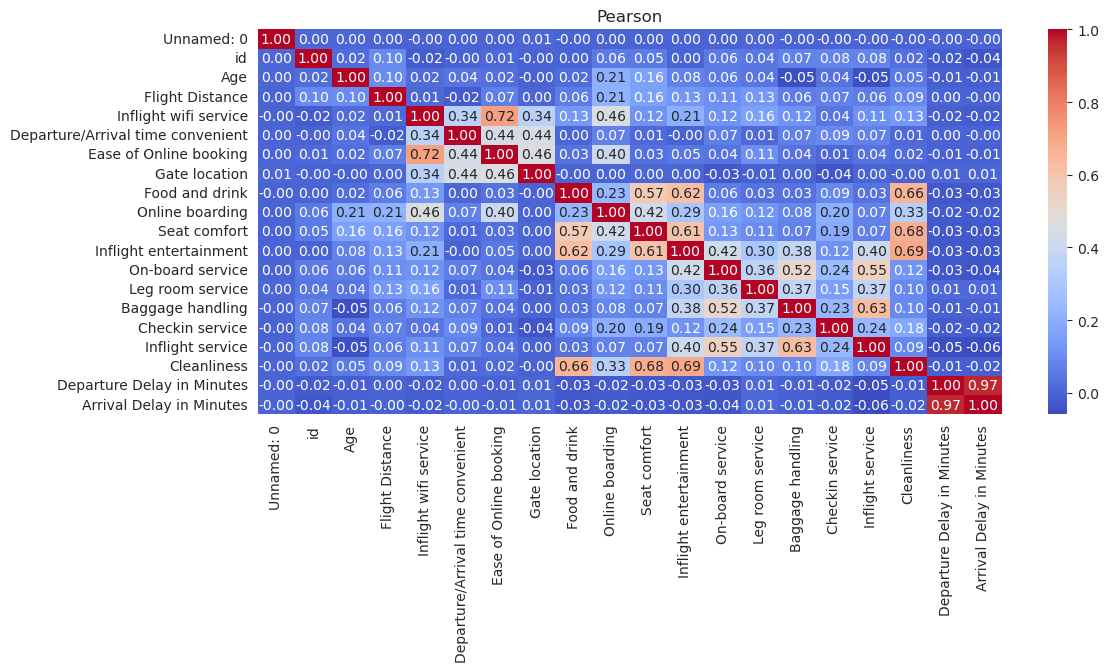

In [24]:
pearson_corr = df.corr(method='pearson',numeric_only=True)

plt.figure(figsize=(12,5))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson')


* Departure Delay ile Arrival Delay arasında çok yüksek pozitif korelasyon (~0.97): kalkış gecikmesinin varış gecikmesini doğrudan etkilediğini gösterir.

* Baggage handling ile Cleanliness arasında yüksek korelasyon (Pearson ~0.66): bagaj hizmeti memnuniyeti ile kabin temizliği algısı birbirine yakın.

* Hizmet kalitesi puanları (Seat comfort, Food and drink, Inflight entertainment vb.) arasında orta düzeyde pozitif ilişkiler (0.4–0.6 arası): genel hizmet algısı tutarlı.

* Ease of Online booking ile Online boarding arasında orta düzey korelasyon (~0.44): çevrim içi rezervasyon kolaylığı memnuniyeti ile biniş sürecinin benzer deneyim algısına sahip.

* Flight Distance ile puanlama değişkenleri arasındaki korelasyon çok düşük (<0.1): uçuş mesafesinin hizmet memnuniyetini etkilemediği söylenebilir.

## 3. Eksik Değer Analizi

Bu bölümde:

1. Eksik değerlerin sayısal ve oransal özetini çıkaracağız.  
2. `missingno` ile görselleştirme yapacağız.  
3. Basit (median/mod) ve gelişmiş (KNN Imputer) iki farklı doldurma stratejisini uygulayıp karşılaştıracağız.


### 3.1 Eksik Değerlerin Özeti

In [5]:
missing = df.isna().sum().to_frame(name="count")
missing["percent"] = 100 * missing["count"] / len(df)
display(missing.sort_values("percent", ascending=False))

,count,percent
Arrival Delay in Minutes,310,0.298352
id,0,0.000000
Gender,0,0.000000
Customer Type,0,0.000000
Age,0,0.000000
Type of Travel,0,0.000000
Class,0,0.000000
Flight Distance,0,0.000000
Unnamed: 0,0,0.000000
Inflight wifi service,0,0.000000


* Tüm değişkenler içinde **Arrival Delay in Minutes** haricinde eksik veri bulunmuyor; bu değişkende 310 adet (%0.30) boş kayıt var.  
* Eksik oranı oldukça düşük olduğu için bu kayıtları silmek yerine **medyan değer ile doldurma** stratejisi uygundur; böylece veri setinin bütünlüğü korunur.  
* Alternatif olarak KNN Imputer ile doldurma yaptığımızda da toplam eksik değer sayısı sıfıra indi; ancak basit medyan atama, yorumlanabilirliği ve yeniden üretilebilirliği artıracağı için tercih edilebilir.


### 3.2 Eksik Değer Görselleştirme


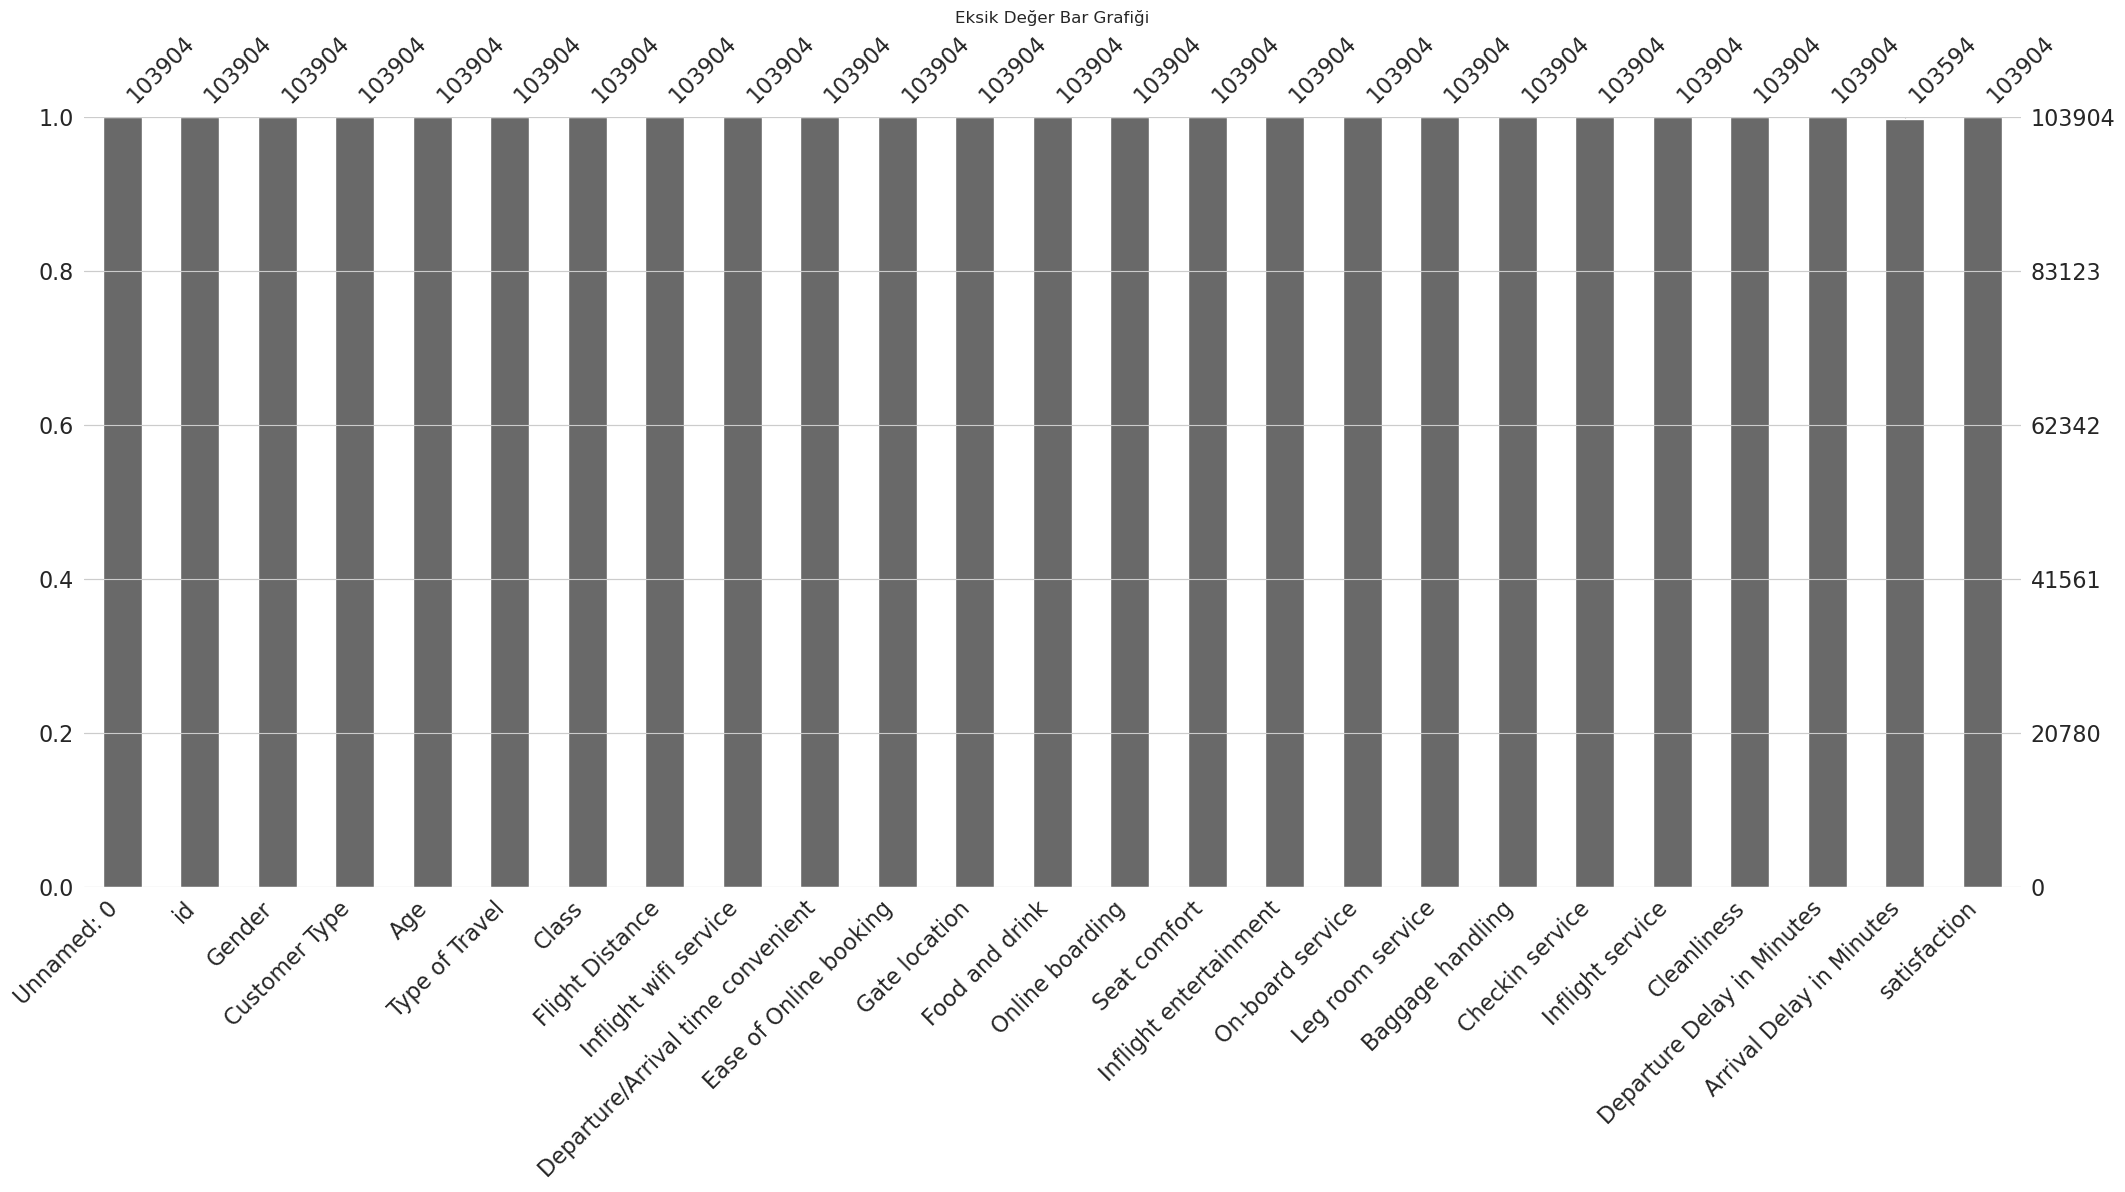

<Figure size 1000x400 with 0 Axes>

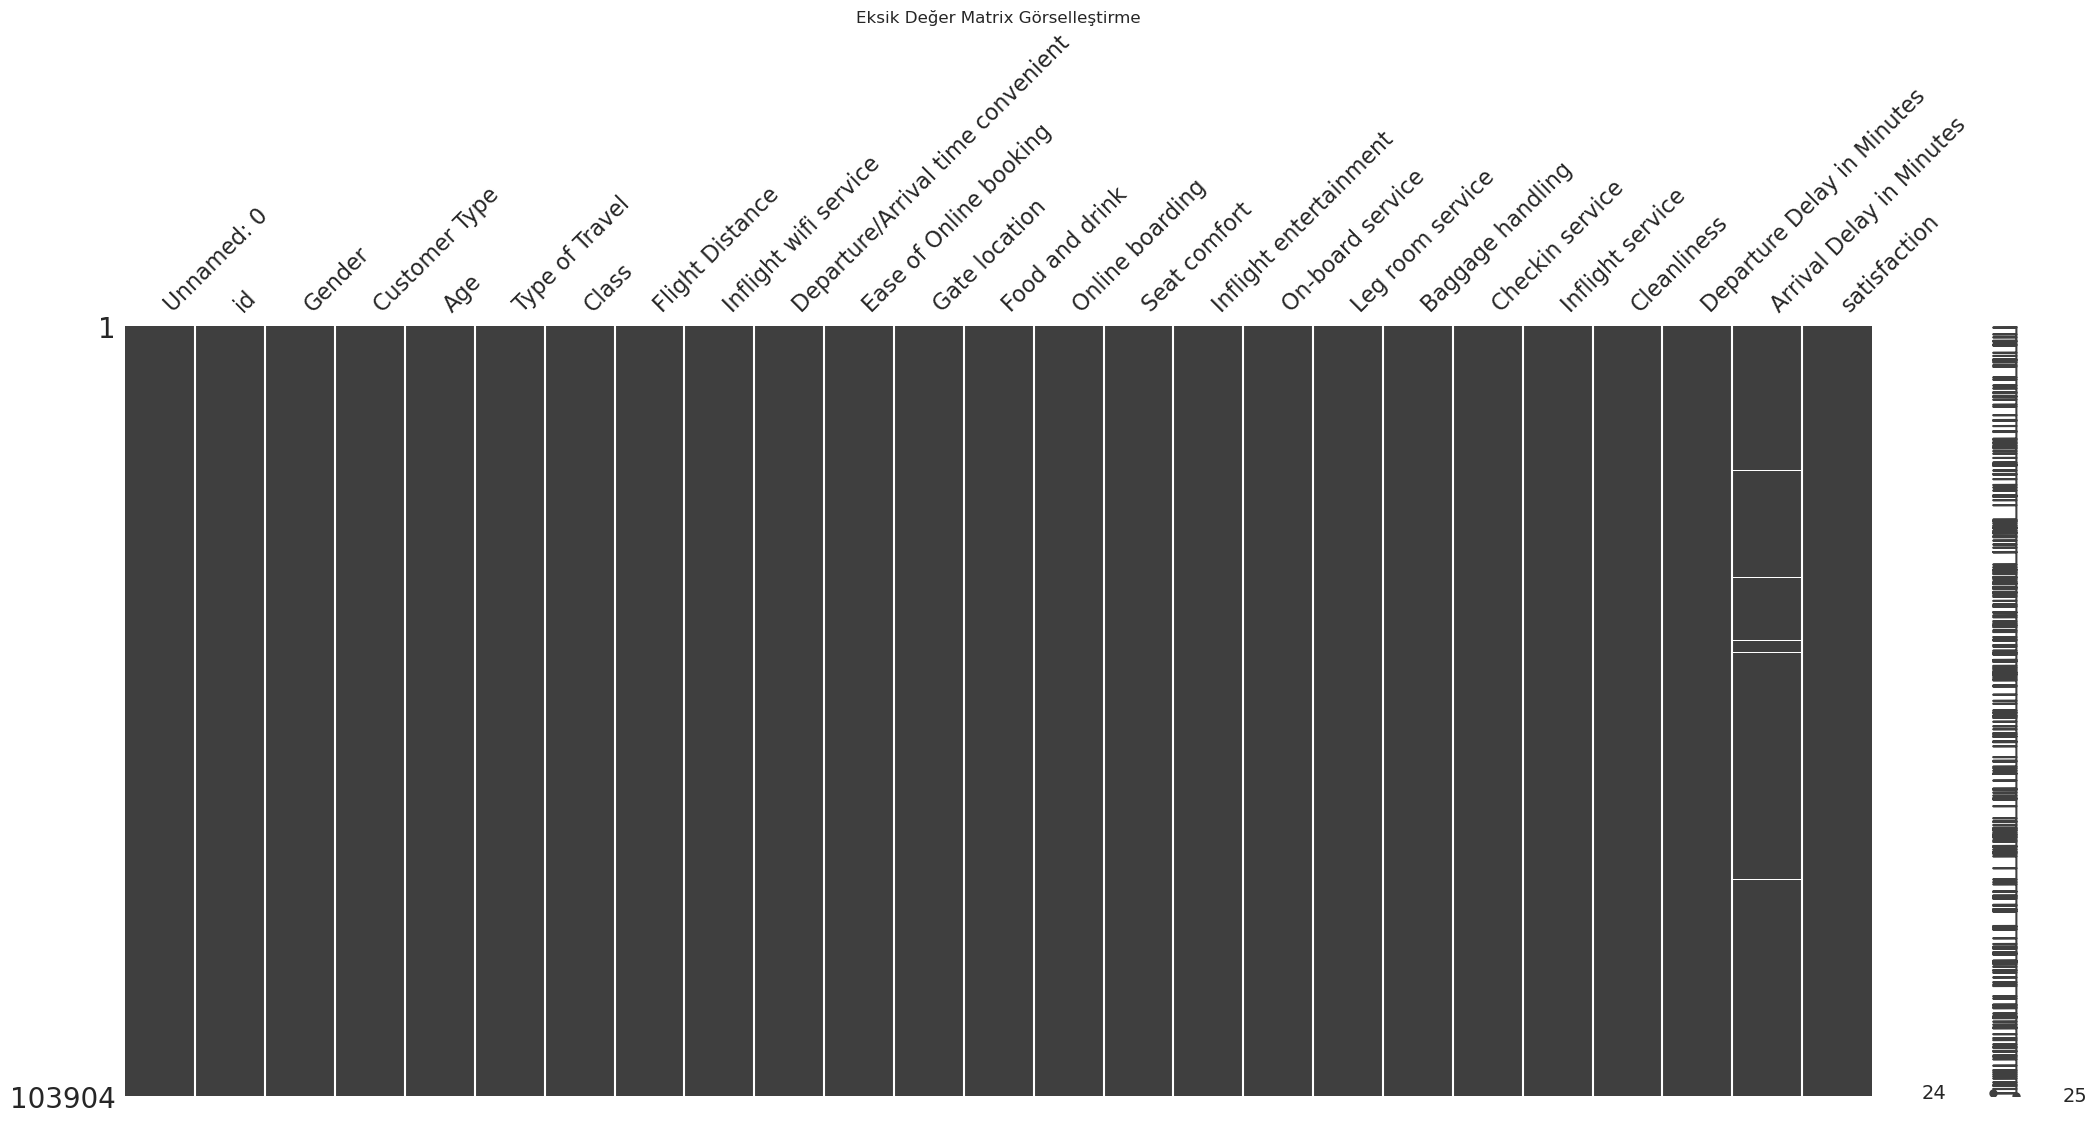

In [6]:
import missingno as msno

plt.figure(figsize=(6,4))
msno.bar(df)
plt.title("Eksik Değer Bar Grafiği")
plt.show()

plt.figure(figsize=(10,4))
msno.matrix(df)
plt.title("Eksik Değer Matrix Görselleştirme")
plt.show()

### 3.3 Basit İmputation (Median/Mod)

In [28]:
df_simple = df.copy()

num_cols = df_simple.select_dtypes(include=np.number).columns
for col in num_cols:
    df_simple.fillna({col: df_simple[col].median()}, inplace=True)

cat_cols = df_simple.select_dtypes(include="object").columns
for col in cat_cols:
    df_simple.fillna({col: df_simple[col].mode()[0]}, inplace=True)

print("Basit doldurma sonrası eksik toplamı:", df_simple.isna().sum().sum())

Basit doldurma sonrası eksik toplamı: 0


- **Basit İmputation (Median/Mod):** Hızlı, kolay ve yorumlanabilir; ancak medyan veya mode ataması veri dağılımını hafifçe bozabilir ve değişkenler arası ilişkileri dikkate almaz.  

### 3.4 Gelişmiş İmputation (KNN Imputer)

In [29]:
df_knn = df.copy()
imputer = KNNImputer(n_neighbors=5)
df_knn[num_cols] = imputer.fit_transform(df_knn[num_cols])

for col in cat_cols:
    df_knn.fillna({col: df_knn[col].mode()[0]}, inplace=True)

print("KNN Imputer sonrası eksik toplamı:", df_knn.isna().sum().sum())

KNN Imputer sonrası eksik toplamı: 0


- **KNN Imputer:** Her gözlem için en benzer (komşu) k değerine göre eksik veriyi doldurur; bu sayede veri içindeki örtük kalıpları ve değişkenler arası ilişkiyi daha iyi korur, fakat daha fazla hesaplama gücü gerektirir ve komşu seçimine duyarlıdır.  
- Bu proje kapsamında, dağılımı koruma açısından KNN Imputer güçlü bir yöntem olsa da, basit medyan ataması yorumlanabilirliği ve hızı nedeniyle daha tercih edilinebilir bir yöntem.  


## 4. Aykırı Değer Analizi

Bu bölümde:

1. **IQR Yöntemi** ile sayısal değişkenlerde uç değerleri tespit edeceğiz.  
2. **Z-score Yöntemi** ile bir diğer uç değer listesi oluşturacağız.  
3. **Boxplot** ve **Violin Plot** kullanarak görselleştirme yapacağız.  
4. Sonuçlardan hareketle aykırı değerlerle nasıl başa çıkacağımızı (silme, kırpma, robust ölçekleme vb.) tartışacağız.


### 4.1 IQR ile Outlier Tespiti

In [9]:
def detect_outliers_iqr(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

In [10]:
#sayısal kolonlar
num_cols = df.select_dtypes(include=np.number).columns.tolist()
#her değişkende kaç outlier var
iqr_outliers = {col: detect_outliers_iqr(df[col].dropna()).shape[0] for col in num_cols}
iqr_outliers = pd.Series(iqr_outliers, name="iqr_outlier_count")
display(iqr_outliers.sort_values(ascending=False))

Departure Delay in Minutes           14529
Arrival Delay in Minutes             13954
Checkin service                      12891
Flight Distance                       2291
Age                                      0
id                                       0
Unnamed: 0                               0
Inflight wifi service                    0
Food and drink                           0
Departure/Arrival time convenient        0
Ease of Online booking                   0
Gate location                            0
Inflight entertainment                   0
Seat comfort                             0
Online boarding                          0
On-board service                         0
Baggage handling                         0
Leg room service                         0
Cleanliness                              0
Inflight service                         0
Name: iqr_outlier_count, dtype: int64

* **IQR yöntemi**ne göre en çok uç değer “Departure Delay in Minutes” (14.529) ve “Arrival Delay in Minutes” (13.954) değişkenlerinde yoğunlaşıyor; gecikme verilerinin dağılımı oldukça geniş ve bazı aşırı yüksek değerler barındırıyor.  
* “Checkin service” (12.891) ve “Flight Distance” (2.291) da belirgin sayıda aykırı gözlem içeriyor; check-in puanlamasında ve uçuş mesafelerinde uç değerler muhtemelen veri girişi hatalarına veya nadir seyahat senaryolarına işaret ediyor.  
* Diğer sayısal değişkenlerde (Age, İnflight servis puanları vb.) neredeyse hiç aykırı değer yok, bu da bu kolonların tutarlı ölçüm sağlayıp uç değer barındırmadığını gösteriyor.  

### 4.2 Z-score ile Outlier Tespiti

In [11]:
z_outliers = {}
for col in num_cols:
    zs = np.abs(stats.zscore(df[col].dropna()))
    #genelde z>3 eşik olarak alınır
    z_outliers[col] = np.sum(zs > 3)
z_outliers = pd.Series(z_outliers, name="zscore_outlier_count")
display(z_outliers.sort_values(ascending=False))

Arrival Delay in Minutes             2225
Departure Delay in Minutes           2222
Flight Distance                        58
Age                                    17
Inflight service                        3
id                                      0
Unnamed: 0                              0
Inflight wifi service                   0
Food and drink                          0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Inflight entertainment                  0
Seat comfort                            0
Online boarding                         0
On-board service                        0
Checkin service                         0
Baggage handling                        0
Leg room service                        0
Cleanliness                             0
Name: zscore_outlier_count, dtype: int64

* **Z-score yöntemi**, IQR’e kıyasla çok daha katı bir eşik kullanarak gecikme değişkenlerinde yalnızca ~2.2 k adet uç değer tespit etti (IQR’de 14.5 k / 13.9 k idi). Bu, dağılımın sağa çarpık olması nedeniyle IQR’in orta uçları da “aykırı” olarak işaretlemesinden kaynaklanıyor.  
* **Flight Distance** için Z-score ile sadece 58 outlier görünüyor; IQR’de ise 2 291 adetti. Bu da mesafe verisinin dağılımındaki uç değerlerin çok daha uç noktalarda kaldığını gösteriyor.  
* **Age** değişkeninde IQR sıfır outlier bulurken Z-score 17 tanımlamış; yaş dağılımı nispeten dar olduğu için ±3σ dışında kalan birkaç kayıt var.  

### 4.3 Görselleştirme: Boxplot & Violin Plot

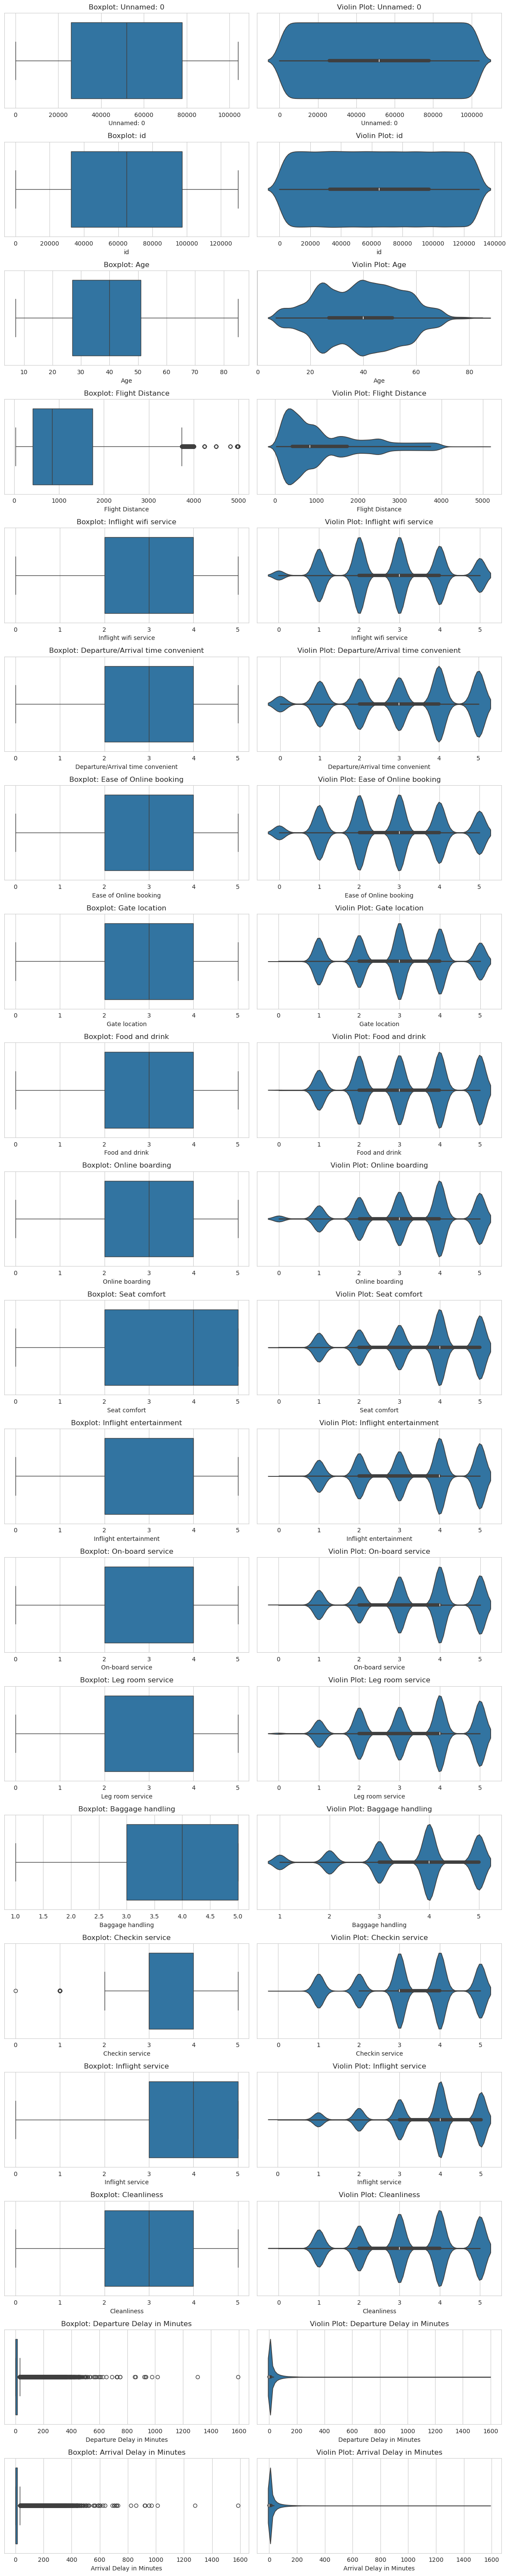

In [12]:
plt.figure(figsize=(12, len(num_cols)*3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2*i-1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")

    plt.subplot(len(num_cols), 2, 2*i)
    sns.violinplot(x=df[col])
    plt.title(f"Violin Plot: {col}")
plt.tight_layout()
plt.show()

- **Age**  
  - **Boxplot:** Yaş verileri yaklaşık 20–60 yaş aralığında yoğunlaşıyor; 7–85 yaş arasında birkaç uç değer var.  
  - **Violin Plot:** Dağılım tek tepe (unimodal) ve nispeten simetrik, yaş dağılımı merkezi 35–45 civarında.

- **Flight Distance**  
  - **Boxplot:** Uçuş mesafeleri çoğunlukla 400–1.500 mil arasında; 1.743’ün üzerinde ve 5.000’e yaklaşan birkaç ekstrem uç değer mevcut.  
  - **Violin Plot:** Dağılım belirgin şekilde sağa çarpık; kısa uçuşlar en sık, uzun mesafeler ise nadir.

- **Likert-ölçekteki Hizmet Puanları**  
  (Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness)  
  - **Boxplot:** Puanlar 0–5 aralığında, çoğunluk 2–4 bandında. Uç değerler (0 veya 5’in dışındaki değerler) nadir.  
  - **Violin Plot:** Her bir tam puan düzeyinde net yoğunluk zirveleri var, bu da katılımcıların genellikle tam sayılarla cevap verdiğini gösteriyor.

- **Departure Delay in Minutes**  
  - **Boxplot:** Çoğu uçuş 0–60 dakika arasında, ancak 200–1.600 dakika arasında birkaç çok ekstrem uç değer var.  
  - **Violin Plot:** Dağılım aşırı derecede sağa çarpık; neredeyse tüm yoğunluk 0–30 dakika aralığında, uzun kuyruk ise çok nadir çok geç varışları gösteriyor.

- **Arrival Delay in Minutes**  
  - **Boxplot:** Benzer şekilde, 0–60 dakika arası yoğunluk; 1.500+ dakikaya kadar uzanan birkaç aşırı uç değer bulunuyor.  
  - **Violin Plot:** Çok sağa çarpık yoğunluk; en büyük yoğunluk 0–20 dakika aralığında.

**Genel Değerlendirme:**  
- Continuous (yaş, mesafe, gecikme) değişkenler çok sayıda aşırı uç (özellikle gecikme verilerinde) içeriyor ve dağılımları sağa çarpık.  
- Ordinal (hizmet puanları) değişkenlerse tam sayılarda kümelenmiş, orta puanlara (3–4) doğru yoğunluk gösteriyor.  
- Bu görseller, aykırı değer stratejilerini (kırpma veya robust ölçekleme) gecikme verileri için özellikle önemli kılıyor; hizmet puanları ise ek bir işleme ihtiyaç duymadan analizde kullanılabilir.  



## 5. Görselleştirme

### 5.1 Age Histogram

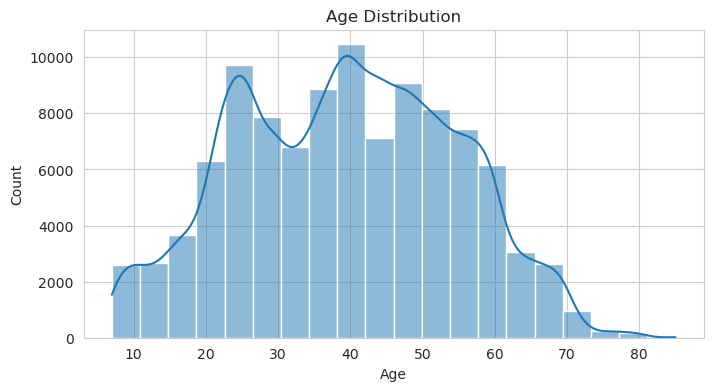

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 5.2 Flight Distance Histogram 

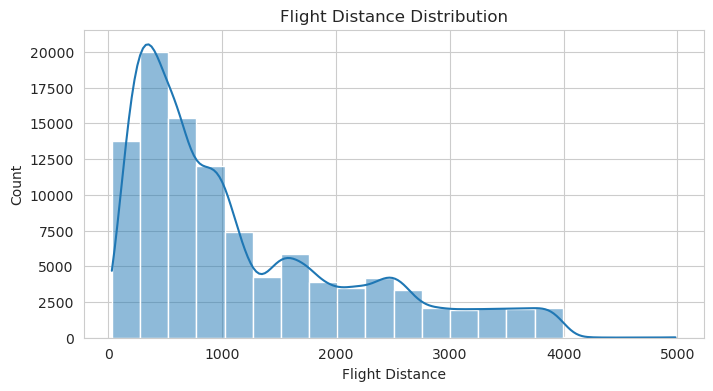

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(df['Flight Distance'].dropna(), bins=20, kde=True)
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.show()


### 5.3 Departure Delay Boxplot

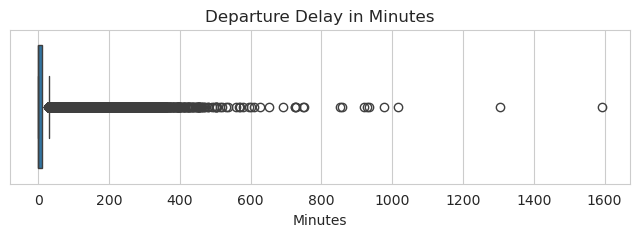

In [15]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['Departure Delay in Minutes'].dropna())
plt.title('Departure Delay in Minutes')
plt.xlabel('Minutes')
plt.show()


### 5.4 Arrival Delay Boxplot

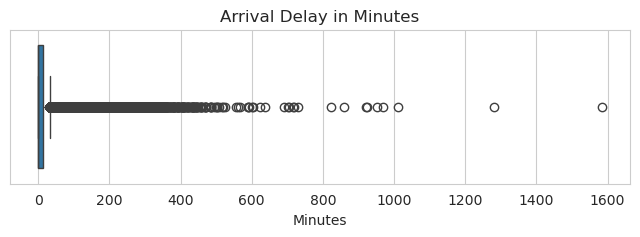

In [16]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['Arrival Delay in Minutes'].dropna())
plt.title('Arrival Delay in Minutes')
plt.xlabel('Minutes')
plt.show()

### 5.5 Flight Distance vs Arrival Delay Scatter

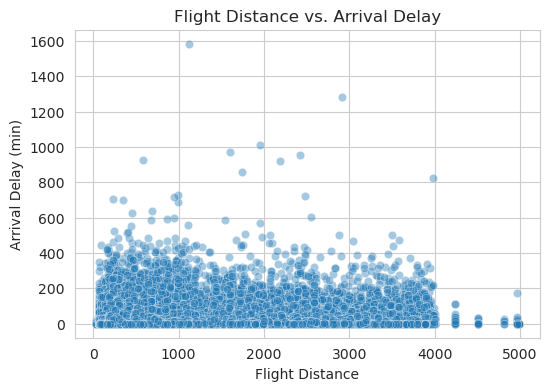

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['Flight Distance'], 
    y=df['Arrival Delay in Minutes'], 
    alpha=0.4
)
plt.title('Flight Distance vs. Arrival Delay')
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay (min)')
plt.show()

### 5.6 Gender Countplot

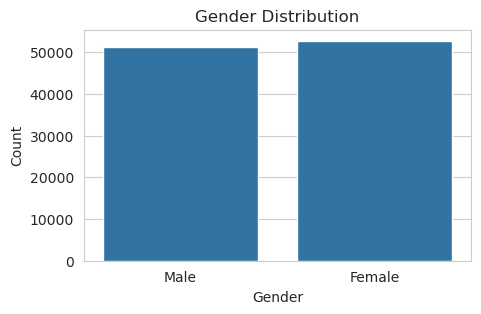

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### 5.7 Class Pie Chart

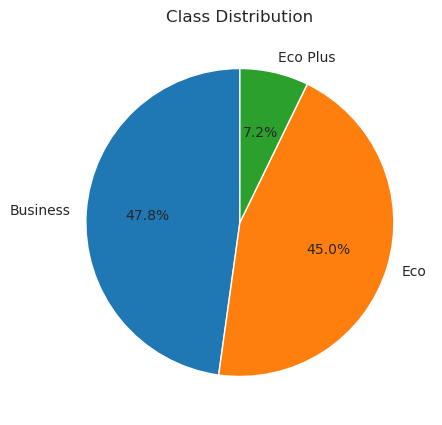

In [19]:
class_counts = df['Class'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(
    class_counts.values, 
    labels=class_counts.index, 
    autopct='%.1f%%', 
    startangle=90
)
plt.title('Class Distribution')
plt.show()
